In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observation=1000
xs=np.random.uniform(-10,10,(observation,1))
zs=np.random.uniform(-10,10,(observation,1))

gen_input=np.column_stack((xs,zs))
noise=np.random.uniform(-0.1,0.1,(observation,1))
gen_target=2*xs-3*zs+5+noise

np.savez('TF_intro',inputs=gen_input, targets=gen_target)


In [3]:
training_data=np.load('TF_intro.npz')

In [4]:
input_size=2
output_size=1

model=tf.keras.Sequential([
    tf.keras.layers.Dense(
    output_size,
    kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
    )
])
model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 0s - loss: 32.0409
Epoch 2/100
32/32 - 0s - loss: 3.7266
Epoch 3/100
32/32 - 0s - loss: 1.0619
Epoch 4/100
32/32 - 0s - loss: 0.2929
Epoch 5/100
32/32 - 0s - loss: 0.0830
Epoch 6/100
32/32 - 0s - loss: 0.0252
Epoch 7/100
32/32 - 0s - loss: 0.0096
Epoch 8/100
32/32 - 0s - loss: 0.0054
Epoch 9/100
32/32 - 0s - loss: 0.0041
Epoch 10/100
32/32 - 0s - loss: 0.0037
Epoch 11/100
32/32 - 0s - loss: 0.0036
Epoch 12/100
32/32 - 0s - loss: 0.0037
Epoch 13/100
32/32 - 0s - loss: 0.0037
Epoch 14/100
32/32 - 0s - loss: 0.0037
Epoch 15/100
32/32 - 0s - loss: 0.0036
Epoch 16/100
32/32 - 0s - loss: 0.0036
Epoch 17/100
32/32 - 0s - loss: 0.0036
Epoch 18/100
32/32 - 0s - loss: 0.0037
Epoch 19/100
32/32 - 0s - loss: 0.0036
Epoch 20/100
32/32 - 0s - loss: 0.0036
Epoch 21/100
32/32 - 0s - loss: 0.0036
Epoch 22/100
32/32 - 0s - loss: 0.0036
Epoch 23/100
32/32 - 0s - loss: 0.0036
Epoch 24/100
32/32 - 0s - loss: 0.0036
Epoch 25/100
32/32 - 0s - loss: 0.0036
Epoch 26/100
32/32 - 0s - loss: 0

In [5]:
## extract weight and bias

In [6]:
weight=model.layers[0].get_weights()[0]
bias=model.layers[0].get_weights()[1]
print(weight)
print(bias)

[[ 1.9982007]
 [-3.0032823]]
[5.0015516]


In [7]:
out=model.predict_on_batch(training_data['inputs'])

/home/sanyam/anaconda3/envs/py3-tf/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


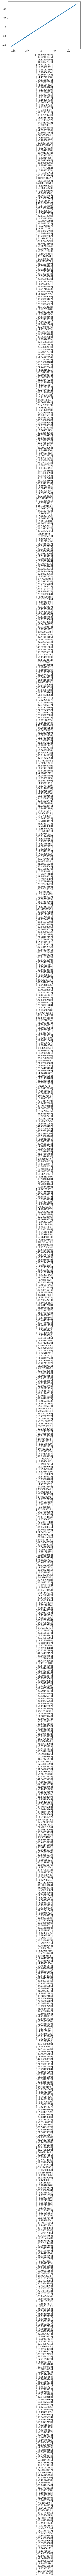

In [8]:
plt.plot(out,np.squeeze(gen_target))
plt.xlabel(out)
plt.xlabel(gen_target)
plt.show()